<a href="https://colab.research.google.com/github/aragaoian/dip-notebooks/blob/master/notebooks/opera%C3%A7%C3%B5es-pontuais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operações Pontuais

Pode ser definido como qualquer transformação aplicada pixel a pixel em uma imagem.

In [110]:
# Instalar as bibliotecas necessárias

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Converter RGB para Grayscale

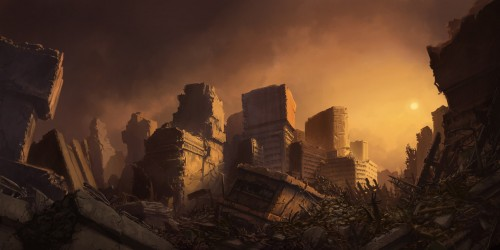

In [111]:
img = cv2.imread('t1.jpg', 1) # mostrar imagem original
cv2_imshow(img)

### Conversão Básica

Consiste em somar as bandas e dividir pela quantidade. <br>
No caso de RGB: $$ \frac{R + B + G}{3} $$

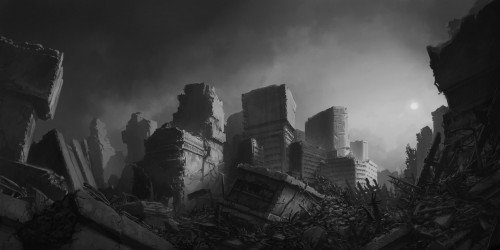

In [112]:
# NumPy
img_in = img
R = img_in[:, :, 0]
G = img_in[:, :, 1]
B = img_in[:, :, 2]

"""
img_grayscale_basic_np = (R + G + B)/3 -> causa overflow
"""
img_grayscale_basic_np = (R/3 + G/3 + B/3)
img_grayscale_basic = np.array(img_grayscale_basic_np, dtype=np.uint8)

# OpenCV
B, G, R = cv2.split(img)
img_grayscale_basic_cv2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_grayscale_basic = np.array(img_grayscale_basic_cv2, dtype=np.uint8)

cv2_imshow(img_grayscale_basic)

### Conversão ponderada

Consiste em adicionar um peso para cada banda.
$$ R\cdot0.299 + G\cdot0.587 + B\cdot0.114$$

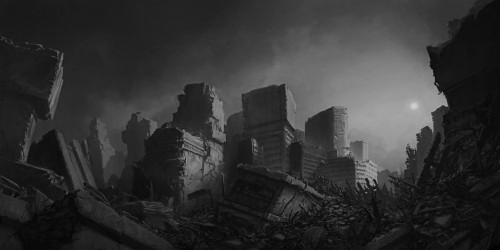

In [113]:
# NumPy
img_in = img
R = img_in[:, :, 0] * 0.299
G = img_in[:, :, 1] * 0.587
B = img_in[:, :, 2] * 0.114

img_grayscale_pondered_np = R+G+B
img_grayscale_pondered = np.array(img_grayscale_pondered_np,dtype=np.uint8)

# OpenCV
B, G, R = cv2.split(img)
img_grayscale_pondered_cv2 = cv2.transform(
    img,
    np.array([[0.299, 0.587, 0.114]])
).astype(np.uint8)

cv2_imshow(img_grayscale_pondered_cv2)

## Histograma de uma Imagem

In [114]:
histogram = np.zeros(256)
img_hist = img_grayscale_pondered # imagem em grayscale

for i in range(img_hist.shape[0]):
    for j in range(img_hist.shape[1]):
        histogram[img_hist[i, j]] += 1

x_linear_space = np.linspace(0, 255, 256)

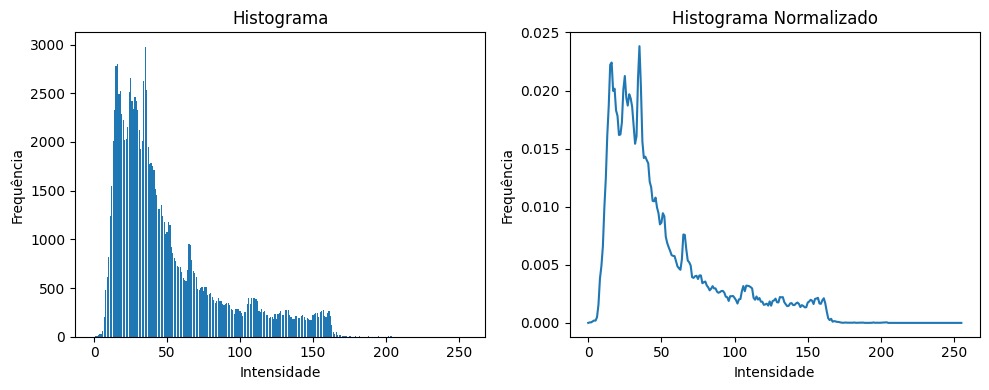

In [115]:
_, axs = plt.subplots(1, 2, figsize=(10, 4))

# Histograma
axs[0].bar(x_linear_space, histogram)
axs[0].set_xlabel("Intensidade")
axs[0].set_ylabel("Frequência")
axs[0].set_title("Histograma")

# Histograma Normalizado
w, h = img_hist.shape
normalized_histogram = histogram / (w*h) # PDF (Probability Density Function) ou L1 norm
axs[1].plot(x_linear_space, normalized_histogram)
axs[1].set_xlabel("Intensidade")
axs[1].set_ylabel("Frequência")
axs[1].set_title("Histograma Normalizado")

plt.tight_layout()
plt.show()

## Transformações

### Negativo

É um efeito linear inverso, onde as cores mais claras se tornam mais escuras e as mais escuras se tornam mais claras.

A fórmula do negativo pode ser representada por:
$s = T r = L - 1 - r = 255-r$

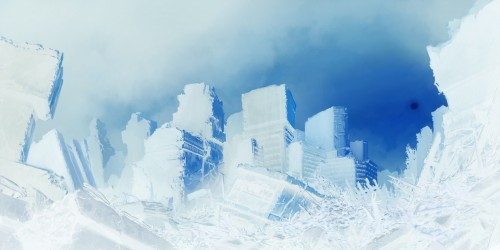

In [116]:
w, h, c = img.shape
img_negative = img

# Primeira maneira
# for i in range(w):
#     for j in range(h):
#         for channels in range(c):
#             # Lembrar de utilizar os canais na hora da operação
#             img_negative[i, j, channels] = 255 - img_negative[i, j, channels]

# Segunda maneira
img_negative[:,:,0:3] = 255 - img # aplicar em todas bandas
img_out = img_negative.astype(np.uint8)

cv2_imshow(img_out)

### Logaritímica

Utilizado para realçar feixes escuros. Isto é um faixa estreita de baixo valores que tem possuem pouca intensidade, tornando-a mais ampla.

A fórmula se da por: $T(r) = c \cdot log(1+r)$

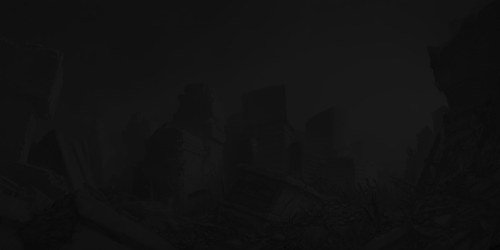

In [117]:
img_in = img_grayscale_pondered

c = 5
img_logarithm = c * np.log(1 + img_in)
img_out = img_logarithm.astype(np.float32)

cv2_imshow(img_out)

### Gamma

Tem a mesma finalidade que a transformação logarítimica, mapeando uma faixa estreita de valores com uma intensidade menor para uma faixa mais ampla na imagem transformada.

A fórmula que define essa transformação é: $s = cr^γ$

1. $c$ é uma constante
3. Consideramos que $r>=0$
2. $\gamma$ é valor positivo constante

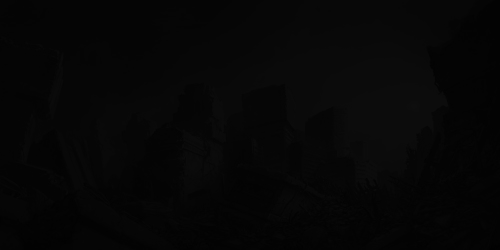

In [118]:
img_in = img_grayscale_pondered

c = 1
gamma = 0.5
img_gamma = c * np.pow(img_in, gamma)
img_out = img_gamma.astype(np.uint8)

cv2_imshow(img_out)

### Alargamento de Contraste

Transformação mais adequada para imagens com histogramas que seguem a distribuição gaussiana ou quase-gaussiana

A fórmula pode ser descrita como:

$
z' =
\begin{cases}
\dfrac{z}{2}, & \text{se } z \leq 85 \\[6pt]
2z - 127, & \text{se } 85 < z < 170 \\[6pt]
\dfrac{z}{2} + 128, & \text{se } z \geq 170
\end{cases}
\quad \in [0, 255]
$

/tmp/ipython-input-2261779365.py:11: RuntimeWarning: overflow encountered in scalar multiply
  img_in[i, j, channels] = 2 * pixel - 127
/tmp/ipython-input-2261779365.py:11: RuntimeWarning: overflow encountered in scalar subtract
  img_in[i, j, channels] = 2 * pixel - 127


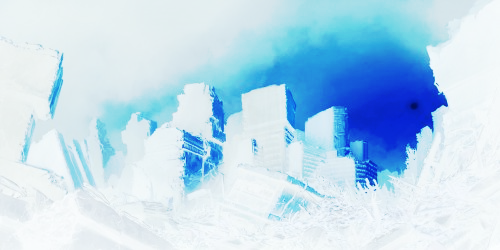

In [119]:
w, h, c = img.shape
img_in = img

for i in range(w):
    for j in range(h):
        for channels in range(c):
            pixel = img_in[i, j, channels]
            if pixel <= 85:
                img_in[i, j, channels] = pixel / 2
            elif 85 < pixel < 170:
                img_in[i, j, channels] = 2 * pixel - 127
            else:
                img_in[i, j, channels] = (pixel/2) + 128

'''
/tmp/ipython-input-812798437.py:11: RuntimeWarning: overflow encountered in scalar multiply
  img_in[i, j, channels] = 2 * pixel - 127
/tmp/ipython-input-812798437.py:11: RuntimeWarning: overflow encountered in scalar subtract
  img_in[i, j, channels] = 2 * pixel - 127

provavelmente se deve clipar os valores
'''

img_out = img_in.astype(np.float32)
cv2_imshow(img_out)

### Contraste e Brilho

Transformação linear que segue um função linear, onde $a$ altera o contraste e $b$ o brilho da imagem.

A fórmula é descrita por uma função linear: $s = ar+b$

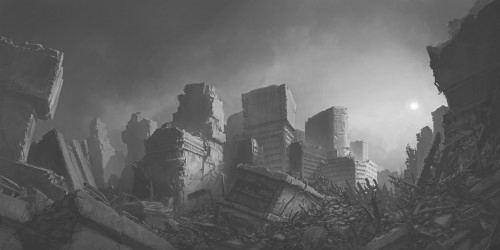

In [120]:
img_in = img_grayscale_pondered

a = 1 # constraste
b = 50 # brilho
img_out = a*img_in + b
img_out = img_out.astype(np.uint8)

cv2_imshow(img_out)

### Limiar

É um técnica de segmentação que transforma imagens em escala de cinza para binário (0 para preto e 255 para branco).

O limiar é definido pela constante $a$.

E a fórmula é definida como:
$
z' =
\begin{cases}
0, se \space z <= a \\[6pt]
z, se \space z > a \\[6pt]
\end{cases}
$

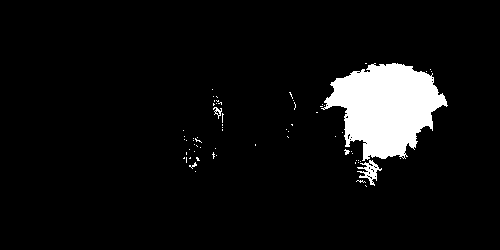

In [121]:
img_in = img_grayscale_pondered
w,h = img_in.shape
a = 127
k = 255

img_out = np.zeros((w, h), dtype=np.uint8)

for i in range(w):
    for j in range(h):
        pixel = img_in[i, j]
        if pixel <= a:
            continue
        elif pixel > a:
            img_out[i, j] = k

cv2_imshow(img_out)

### Limiar - com Fatiamento por Plano

Segue o mesmo conceito do limiar normal, mas especificando um intervalo de intensidades de uma imagem (e.g 127 e 200).

E a fórmula é definida como:
$
z' =
\begin{cases}
0, se \space z <= a \space ou \space z >= b \\[6pt]
z, se a < z < b \\[6pt]
\end{cases}
$

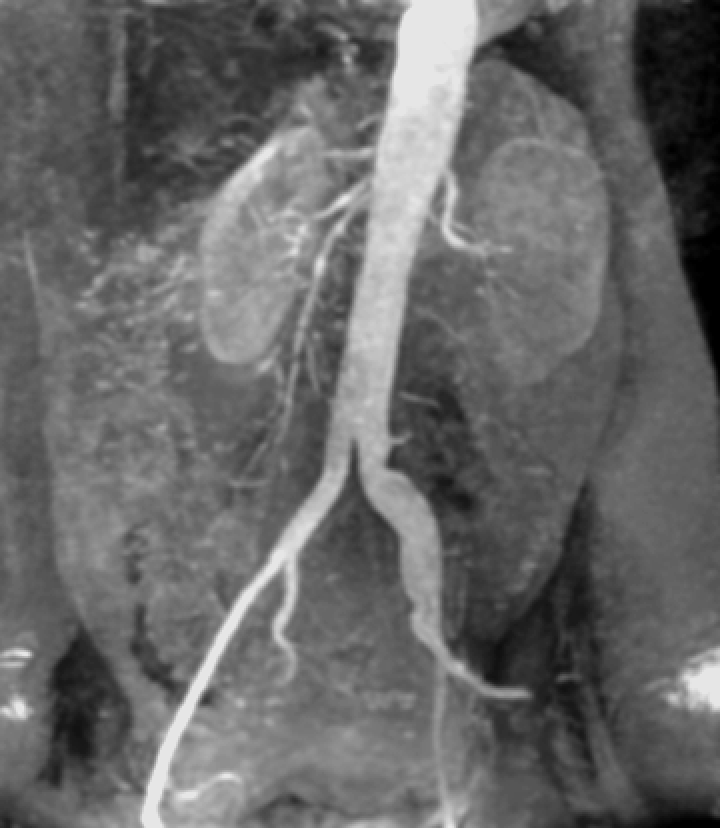

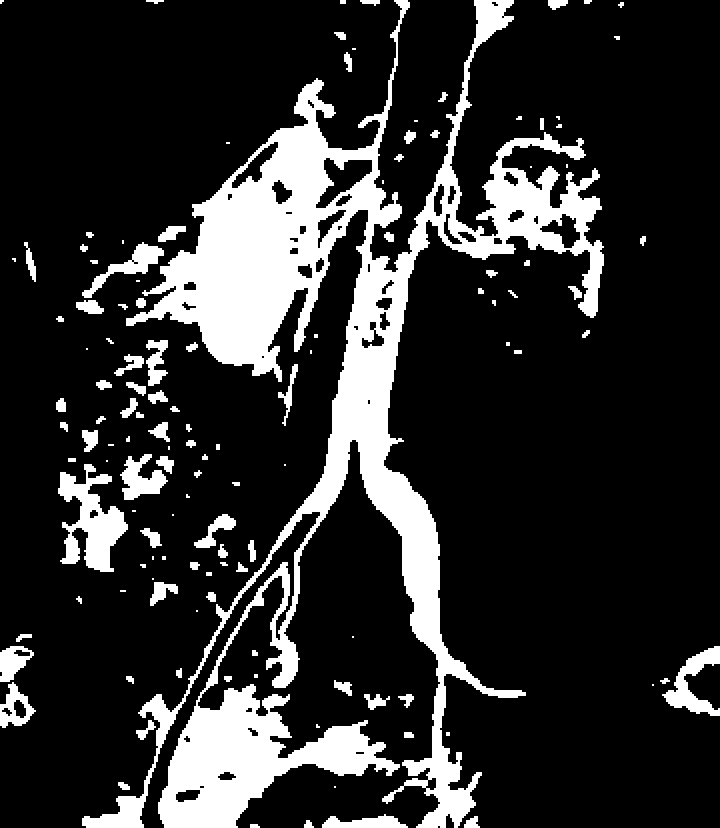

In [122]:
img = cv2.imread("Fig0312(a)(kidney).tif", 1)
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.array(img_cvt, dtype=np.uint8)
cv2_imshow(img)

img_in = img
w,h = img_in.shape
a = 127
b = 200
k = 255

img_out = np.zeros((w, h), dtype=np.uint8)

for i in range(w):
    for j in range(h):
        pixel = img_in[i, j]
        if pixel <= a or pixel >= b:
            img_out[i, j] = 0
        else:
            img_out[i, j] = k

cv2_imshow(img_out)